# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [ ]:
from pathlib import Path
from ec4py import *
from ec4py import CV_Data,EC_Data,AREA,AREA_CM,LEGEND,CV_Datas,RHE,RATE
from ec4py.ec_util import EC_Channels
from ec4py import Quantity_Value_Unit as QV

ModuleNotFoundError: No module named 'matplotlib'

## 2.Make a list of paths to the data files.

In [ ]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV" / "MWE"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_135307_ 3_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_141031_ 3_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_141010_ 3_MI.tdms")

print(type(paths))


c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE
<class 'list'>


## 3. Load in the data files

In [ ]:
import types

In [ ]:
path_to_dataSetFolder.glob("*.tdms")
k = path_to_dataSetFolder.glob("*.tdms")
print(isinstance(k,types.GeneratorType))

True


In [ ]:
print(type(path_to_dataSetFolder.glob("*.tdms")))

<class 'generator'>


In [ ]:
ps = [print(x) for x in path_to_dataSetFolder.glob("*.tdms")]
print(ps)

c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\CV_135307_ 3_MI.tdms
c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\CV_140548_ 9_MI.tdms
c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\CV_140944_ 3_MI.tdms
c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\CV_140951_ 3_MI.tdms
c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\CV_140959_ 3_MI.tdms
c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\CV_141010_ 3_MI.tdms
c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\CV_141031_ 3_MI.tdms
c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\CV_142109_ 8_MI.tdms
[None, None, None, None, None, None, None, None]


In [ ]:
cvs=CV_Datas(path_to_dataSetFolder.glob("*.tdms"),"i_0")

<Axes: xlabel='E (V)', ylabel='Current (A)'>

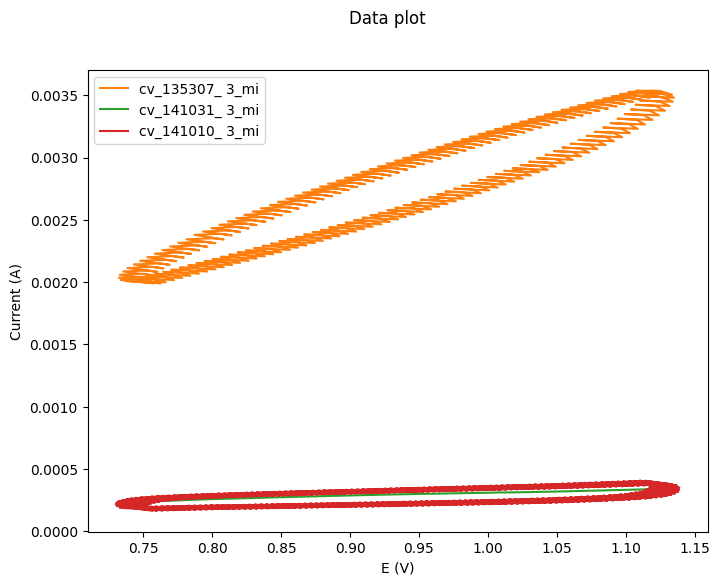

In [ ]:
ec=EC_Datas(paths)
ec.plot("E","i_4")

In [ ]:
a = EC_Channels("i_0")
a.Current
a.Voltage


'E'

In [ ]:
print(ec.setup)
print(ec.setup_data._setup)

AttributeError: 'EC_Datas' object has no attribute 'setup'

MWE
ZERO: 13 [  1   7   9  10  11 205 207 208 210 211 213 214 403] 2x vertex True
[  1   7   9  10  11 205 207 208 210 211 213 214 403]
ZERO: 13 [  1   7   9  10  11 205 207 208 210 211 213 214 403] 2x vertex True
[  1   7   9  10  11 205 207 208 210 211 213 214 403]
ZERO: 3 [202 401 401] 2x vertex False
ZERO: 3 [203 401 401] 2x vertex False


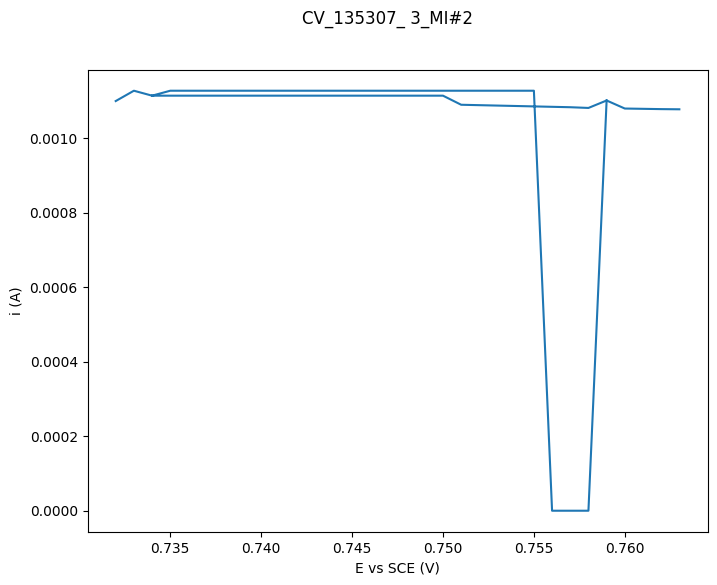

In [ ]:
print(EC_Data(paths[0]).is_MWE)
CV_Data(paths[0],"i_2").plot()
cv_2 = CV_Datas(paths,"i_3")

In [ ]:
cv_2 = CV_Datas(paths,"i_2",IRCOMP="R")
cv_2.plot(RHE,RATE,LEGEND.NONE)
print(cv_2.get_i_at_E(1.3,"aLL"))
cv_2.rate

In [ ]:
cv_2.norm(AREA, AREA_CM)
print(cv_2[0].i_unit)

In [ ]:
CVs = CV_Datas(paths)
for cv in CVs:
    #cv.set_area(0.04532, "cm^2")
    print("aa", cv.area)

In [ ]:
CVs[1].plot(4,title = "aa")

In [ ]:
#plot = CVs.plot("" ,legend = "name", smooth_y=50)
CVs[1].plot(title = "aa")
for cv in CVs[:1]:
    print(cv.rate)
    cv2 = cv * (1 / 1000.)
    #cv2.plot()

#CVs.bg_corr(CVs)
CVs.plot(AREA, LEGEND.NAME)
CVs[0].plot(AREA, LEGEND.RATE)
bg_corr = CVs.bg_corr(path_to_dataSetFolder / "CV_144913_ 3.tdms" )

#bg_corr.plot()

## 4. Levich analysis

In [ ]:
slope1, slope2 = CVs.Levich(-0.5,"area_cm", y_smooth = 11, )
#use the argument to normalize the data

## 5. Koutechy-Levich analysis

In [ ]:
slope1, slope2 = CVs.KouLev(-0.5,"area", y_smooth = 5)
print(slope1 ** 1, slope1 ** -1)
#use the argument to normalize the data

In [ ]:
CVs[0].Tafel([-0.2, -0.1 ],-0.5)

In [ ]:
CVs.Tafel([-0.2, -0.1 ],-0.5)


#use the argument to normalize the data

In [ ]:
CVs.Tafel([-0.2, -0.1 ],-0.5)